# Python pymc3 questions



## 1. Can I add a label/title on trace plot?

I've been searching for the way from:  
https://pymc3.readthedocs.io/en/latest/api/plots.html#pymc3.plots.traceplot


I've been tried as follows:


### a. using ax object to get access for set_title

I got a hint of this way since the webpage has an example code:  
```fig, axs = plt.subplots(3, 2) # 3 RVs  
 pymc3.traceplot(trace, ax=axs)```



In [21]:
# install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as tt
import seaborn as sns
import matplotlib as mpl
from platform import python_version
print('Running on pyMC3 v{}'.format(pm.__version__))
print('Running Python version v{}'.format(python_version()))
print(mpl.__version__)

Running on pyMC3 v3.7
Running Python version v3.7.4
3.1.1


In [10]:
# simple model for further illustration

# observation
N = 10000
z_t = np.random.normal(loc=-4, scale=1)
o_t = np.random.poisson(lam=(np.exp(z_t)*N))

# model 
with pm.Model() as model:
    mu = pm.Uniform('mu', lower = -10, upper= 0)
    sigma = pm.Uniform('sigma', lower = 0, upper= 3)
    z_t =pm.Normal('z_t',mu=mu, sigma=sigma)
    x = pm.Poisson('o_t', mu=tt.exp(z_t)*N, observed=o_t)
    

In [12]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [z_t, sigma, mu]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1000.08draws/s]
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


I am getting this error mesage:   
TypeError: plot_trace() got an unexpected keyword argument 'ax'

TypeError: plot_trace() got an unexpected keyword argument 'ax'

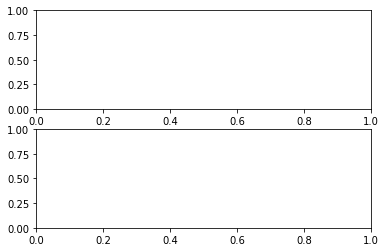

In [14]:
fig, axs = plt.subplots(2) 
pm.traceplot(trace, ax=axs)


But it seems traceplot function has ax argument.

from the webpage:  
*pymc3.plots.traceplot(trace, varnames=None, transform=<function identity_transform>, figsize=None, lines=None, combined=False, plot_transformed=False, grid=False, alpha=0.35, priors=None, prior_alpha=1, prior_style='--', **ax=None**, live_plot=False, skip_first=0, refresh_every=100, roll_over=1000)*
    
    
So I googled **plot_trace()**, 
https://arviz-devs.github.io/arviz/generated/arviz.plot_trace.html
Then I found it has **trace_kwargs** argument for   
extra keyword arguments passed to plt.plot:   
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

The \**kwargs from plt.plot can take legend.   

Then I tried using \**kwargs

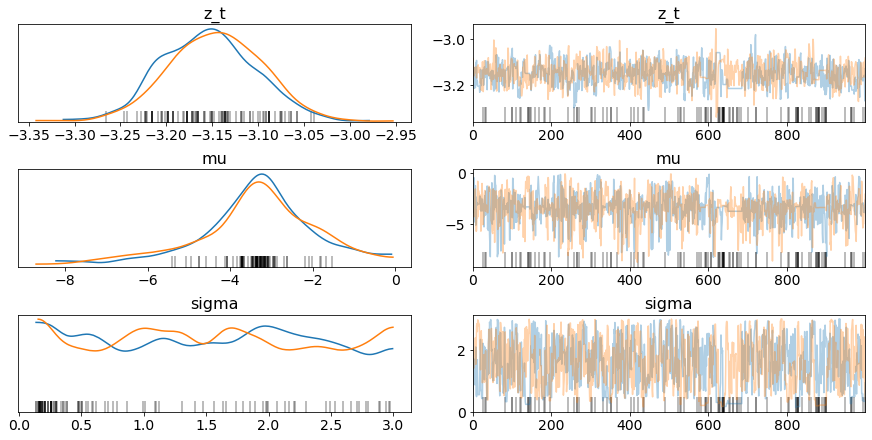

In [19]:
pm.traceplot(trace, trace_kwargs={'label':'test'});

I don't have 'test' label here.

So I wonder is it possible to set title/label to traceplot? 
Thanks in advance.